In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,NaN
1,-0.098505,-0.17857,NaN,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,NaN,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	5
float64		column 3	12
float64		column 4	8
float64		column 5	8
float64		column 6	5
float64		column 7	7
float64		column 8	12
float64		column 9	12
float64		column 10	4
float64		column 11	5
float64		column 12	11


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,793.000000,795.000000,788.000000,792.000000,792.000000,795.000000,793.000000,788.000000,788.000000,796.000000,795.000000,789.000000
mean,1.499930,1.264453,1.981673,1.932928,1.994615,2.009765,1.954593,1.999312,1.994712,1.982761,1.952399,1.967181
std,2.747315,3.638564,1.147327,1.165296,1.171128,1.141893,1.164299,1.140082,1.144409,1.155140,1.180380,1.130107
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.440760,-1.086230,1.020375,0.926915,0.976290,0.999825,0.949500,0.970995,1.057125,1.017250,0.887790,0.970420
50%,0.830950,0.745960,1.967400,1.895400,2.033550,2.009900,1.951200,2.007400,1.980000,1.992000,1.913900,1.974800
75%,3.972900,4.489500,2.925475,2.937200,3.003125,3.014500,2.961300,2.947650,3.005125,2.982000,3.016700,2.898000
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

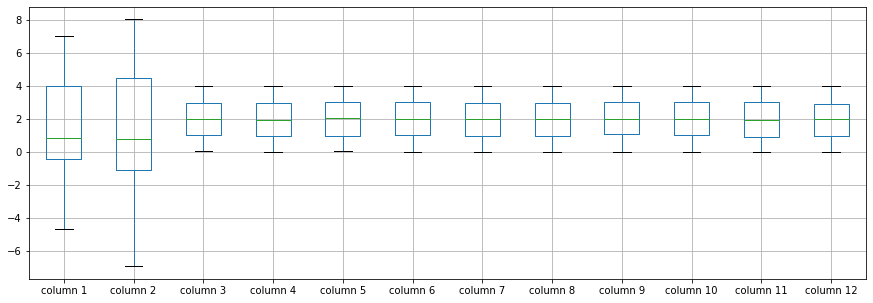

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.499930
column 2     1.264453
column 3     1.981673
column 4     1.932928
column 5     1.994615
column 6     2.009765
column 7     1.954593
column 8     1.999312
column 9     1.994712
column 10    1.982761
column 11    1.952399
column 12    1.967181
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.435427,-0.011051,0.000121,0.039317,0.049667,0.008004,0.023577,-0.001929,0.002415,0.022019,0.032529
column 2,-0.435427,1.000000,-0.012653,-0.025681,-0.027648,-0.011948,0.028765,-0.011201,-0.004210,-0.045699,-0.090011,0.025333
column 3,-0.011051,-0.012653,1.000000,-0.033395,0.079984,-0.000373,0.032090,-0.014099,-0.001361,-0.016069,-0.029296,0.007056
column 4,0.000121,-0.025681,-0.033395,1.000000,0.001877,-0.036378,0.038775,0.040465,-0.023432,0.040426,0.038172,-0.020690
column 5,0.039317,-0.027648,0.079984,0.001877,1.000000,0.060089,0.022087,0.016870,-0.015301,-0.005168,-0.000346,0.011321
column 6,0.049667,-0.011948,-0.000373,-0.036378,0.060089,1.000000,-0.073511,0.038594,0.029374,0.012582,-0.043381,-0.005810
column 7,0.008004,0.028765,0.032090,0.038775,0.022087,-0.073511,1.000000,-0.042502,-0.007401,-0.044220,-0.014812,0.004400
column 8,0.023577,-0.011201,-0.014099,0.040465,0.016870,0.038594,-0.042502,1.000000,-0.052425,-0.049683,0.001668,-0.049573
column 9,-0.001929,-0.004210,-0.001361,-0.023432,-0.015301,0.029374,-0.007401,-0.052425,1.000000,0.041564,-0.009130,-0.019448
column 10,0.002415,-0.045699,-0.016069,0.040426,-0.005168,0.012582,-0.044220,-0.049683,0.041564,1.000000,-0.080720,0.050745


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+40,12+40+40,12+40+40+40,12+40+40+40+40,12+40+40+40,12+40+40,12+40,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.30237258911133
Epoch: 1 , loss: 29.100515480041505
Epoch: 2 , loss: 28.71587699890137
Epoch: 3 , loss: 26.821050186157226
Epoch: 4 , loss: 23.555829963684083
Epoch: 5 , loss: 22.788364982604982
Epoch: 6 , loss: 22.30415767669678
Epoch: 7 , loss: 21.819046058654784
Epoch: 8 , loss: 21.563533325195312
Epoch: 9 , loss: 21.0243737411499
Epoch: 10 , loss: 20.937220306396483
Epoch: 11 , loss: 20.785994453430177
Epoch: 12 , loss: 20.747300338745116
Epoch: 13 , loss: 20.62310245513916
Epoch: 14 , loss: 20.279089279174805
Epoch: 15 , loss: 20.025593452453613
Epoch: 16 , loss: 20.23863296508789
Epoch: 17 , loss: 20.177069664001465
Epoch: 18 , loss: 19.962368621826172
Epoch: 19 , loss: 19.96786407470703
Epoch: 20 , loss: 19.867337188720704
Epoch: 21 , loss: 19.744543075561523
Epoch: 22 , loss: 19.8972766494751
Epoch: 23 , loss: 20.01002471923828
Epoch: 24 , loss: 19.87092582702637
Epoch: 25 , loss: 19.69529727

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.66915
1,0.0,0.0,-1.128482,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
796,0.0,0.0,0.000000,0.091378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
797,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
798,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(16.304178670591664, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.06568385610007878

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.533700,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.077250
1,-0.098505,-0.17857,0.934318,2.921600,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.065000,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.956300,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.631200,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.556120,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.437478,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.264600,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.844000,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_C_1(imp).xlsx", index=False, header=False)